In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
%matplotlib inline

In [2]:
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [3]:
#convert data types
# Convert 'Age' column to integer
df['Age'] = df['Age'].astype(int)

# Convert 'Sleep Duration' column to float
df['Sleep Duration'] = df['Sleep Duration'].astype(float)

# Convert 'Physical Activity Level' column to float
df['Physical Activity Level'] = df['Physical Activity Level'].astype(float)

# Convert 'Stress Level' column to float
df['Stress Level'] = df['Stress Level'].astype(float)

# Convert 'Blood Pressure' column to string
df['Blood Pressure'] = df['Blood Pressure'].astype(str)

# Convert 'Heart Rate' column to integer
df['Heart Rate'] = df['Heart Rate'].astype(int)

# Convert 'Daily Steps' column to integer
df['Daily Steps'] = df['Daily Steps'].astype(int)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int32  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    float64
 7   Stress Level             374 non-null    float64
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int32  
 11  Daily Steps              374 non-null    int32  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(3), int32(3), int64(2), object(5)
memory usage: 33.7+ KB


In [5]:
# lets check for duplicate
df.duplicated().sum()

0

In [6]:
# lets check for null values
df.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [7]:
# drop rows with missing values & remove duplicate rows
df=df.dropna()
df = df.drop_duplicates()

In [8]:
#summary statistics and correlation matrix
df.describe()
df.corr()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
Person ID,1.000000,0.990516,0.296305,0.431612,0.149882,-0.394287,-0.225467,0.043844
Age,0.990516,1.000000,0.344709,0.473734,0.178993,-0.422344,-0.225606,0.057973
Sleep Duration,0.296305,0.344709,1.000000,0.883213,0.212360,-0.811023,-0.516455,-0.039533
Quality of Sleep,0.431612,0.473734,0.883213,1.000000,0.192896,-0.898752,-0.659865,0.016791
Physical Activity Level,0.149882,0.178993,0.212360,0.192896,1.000000,-0.034134,0.136971,0.772723
Stress Level,-0.394287,-0.422344,-0.811023,-0.898752,-0.034134,1.000000,0.670026,0.186829
Heart Rate,-0.225467,-0.225606,-0.516455,-0.659865,0.136971,0.670026,1.000000,-0.030309
Daily Steps,0.043844,0.057973,-0.039533,0.016791,0.772723,0.186829,-0.030309,1.000000


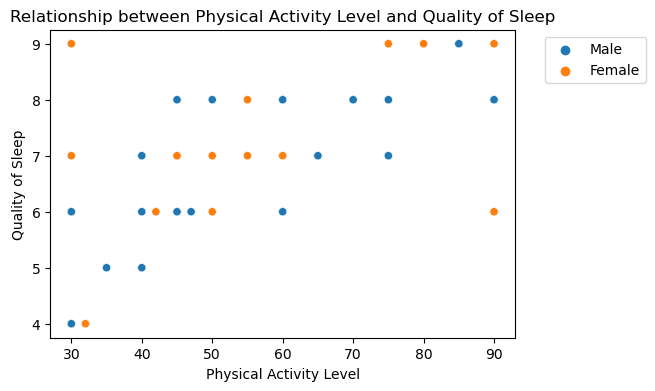

In [9]:
# Visualizations
#  This visualization is a boxplot that compares the quality of sleep between different gender groups in the dataset.
plt.figure(figsize=(6, 4))
sns.scatterplot(x="Physical Activity Level", y="Quality of Sleep", data=df, hue="Gender")
plt.title("Relationship between Physical Activity Level and Quality of Sleep")
plt.xlabel("Physical Activity Level")
plt.ylabel("Quality of Sleep")
plt.legend(bbox_to_anchor = (1.05,1),loc = 'upper left')

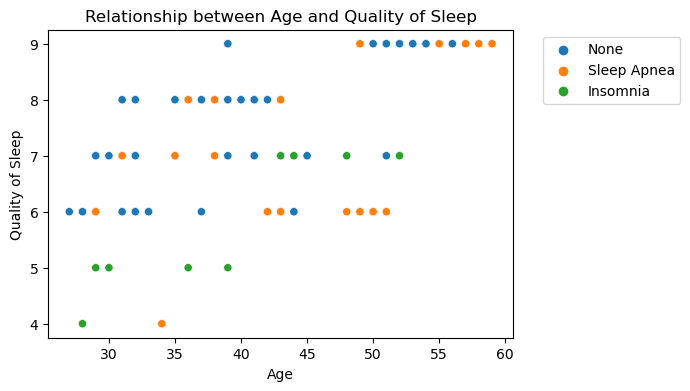

In [10]:
# Relationship Between Age and Quality of Sleep
plt.figure(figsize=(6, 4))
sns.scatterplot(x="Age", y="Quality of Sleep", data=df, hue="Sleep Disorder")
plt.title("Relationship between Age and Quality of Sleep")
plt.xlabel("Age")
plt.ylabel("Quality of Sleep")
plt.legend(bbox_to_anchor = (1.05,1),loc = 'upper left')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Software Engineer'),
  Text(1, 0, 'Doctor'),
  Text(2, 0, 'Sales Representative'),
  Text(3, 0, 'Teacher'),
  Text(4, 0, 'Nurse'),
  Text(5, 0, 'Engineer'),
  Text(6, 0, 'Accountant'),
  Text(7, 0, 'Scientist'),
  Text(8, 0, 'Lawyer'),
  Text(9, 0, 'Salesperson'),
  Text(10, 0, 'Manager')])

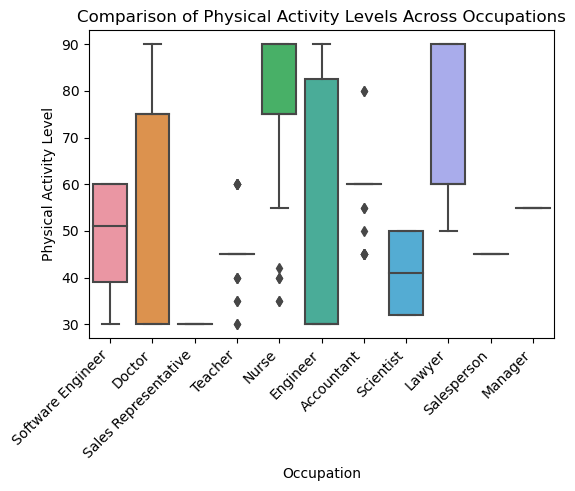

In [11]:
# Comparison of Physical Activity Levels Across Occupations
plt.figure(figsize=(6, 4))
sns.boxplot(x="Occupation", y="Physical Activity Level", data=df)
plt.title("Comparison of Physical Activity Levels Across Occupations")
plt.xlabel("Occupation")
plt.ylabel("Physical Activity Level")
plt.xticks(rotation=45,ha ='right')

In [6]:
#Machine Learning Model for Sleep Disorder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.preprocessing import LabelEncoder

# We encoded categorical variables and dropped 'Blood Pressure' 
# Encode categorical variables
label_encoders = {}
categorical_cols = ["Gender", "Occupation", "BMI Category"]
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Split data into features and target variable
X = df.drop("Sleep Disorder", axis=1)
y = df["Sleep Disorder"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature selection using SelectKBest
selector = SelectKBest(score_func=f_classif, k=5)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Logistic Regression Model
lr_model = LogisticRegression()
lr_model.fit(X_train_selected, y_train)
lr_accuracy = lr_model.score(X_test_selected, y_test)

# Feature selection using Recursive Feature Elimination (RFE)
estimator = DecisionTreeClassifier()
rfe_selector = RFE(estimator, n_features_to_select=5)
X_train_selected_rfe = rfe_selector.fit_transform(X_train, y_train)
X_test_selected_rfe = rfe_selector.transform(X_test)

# Decision Tree Model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_selected_rfe, y_train)
dt_accuracy = dt_model.score(X_test_selected_rfe, y_test)

# Random Forest Model
rf_model = RandomForestClassifier()
rf_model.fit(X_train_selected_rfe, y_train)
rf_accuracy = rf_model.score(X_test_selected_rfe, y_test)

# Support Vector Machines (SVM) Model
svm_model = SVC()
svm_model.fit(X_train_selected_rfe, y_train)
svm_accuracy = svm_model.score(X_test_selected_rfe, y_test)

# Displaying model accuracies
print("Logistic Regression Accuracy:", lr_accuracy)
print("Decision Tree Accuracy:", dt_accuracy)
print("Random Forest Accuracy:", rf_accuracy)
print("SVM Accuracy:", svm_accuracy)


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [11 12] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.8533333333333334
Decision Tree Accuracy: 0.8933333333333333
Random Forest Accuracy: 0.8933333333333333
SVM Accuracy: 0.8533333333333334


In [15]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Define a function to compute evaluation metrics for a model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    f1 = f1_score(y_test, predictions, average='weighted')
    return precision, recall, f1

# Evaluate Logistic Regression model
lr_precision, lr_recall, lr_f1 = evaluate_model(lr_model, X_test_selected, y_test)

# Evaluate Decision Tree model
dt_precision, dt_recall, dt_f1 = evaluate_model(dt_model, X_test_selected_rfe, y_test)

# Evaluate Random Forest model
rf_precision, rf_recall, rf_f1 = evaluate_model(rf_model, X_test_selected_rfe, y_test)

# Evaluate SVM model
svm_precision, svm_recall, svm_f1 = evaluate_model(svm_model, X_test_selected_rfe, y_test)

# Display evaluation metrics
print("Logistic Regression Precision:", lr_precision)
print("Logistic Regression Recall:", lr_recall)
print("Logistic Regression F1-score:", lr_f1)
print('--------------------------------------------')
print("Decision Tree Precision:", dt_precision)
print("Decision Tree Recall:", dt_recall)
print("Decision Tree F1-score:", dt_f1)
print('--------------------------------------------')
print("Random Forest Precision:", rf_precision)
print("Random Forest Recall:", rf_recall)
print("Random Forest F1-score:", rf_f1)
print('--------------------------------------------')
print("SVM Precision:", svm_precision)
print("SVM Recall:", svm_recall)
print("SVM F1-score:", svm_f1)


Logistic Regression Precision: 0.860762006025164
Logistic Regression Recall: 0.8533333333333334
Logistic Regression F1-score: 0.8499034792368125
--------------------------------------------
Decision Tree Precision: 0.8940555555555556
Decision Tree Recall: 0.8933333333333333
Decision Tree F1-score: 0.8883752806333453
--------------------------------------------
Random Forest Precision: 0.8940555555555556
Random Forest Recall: 0.8933333333333333
Random Forest F1-score: 0.8883752806333453
--------------------------------------------
SVM Precision: 0.8583965367965368
SVM Recall: 0.8533333333333334
SVM F1-score: 0.8465408203902827


In [16]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree model
model = DecisionTreeClassifier()

# Define the hyperparameters grid
parameters = {'max_depth': [5, 10, 15], 'min_samples_split': [2, 5, 10]}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(model, parameters, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Initialize Random Forest model
ensemble_model = RandomForestClassifier(n_estimators=100)

# Train the Random Forest model on the training data
ensemble_model.fit(X_train, y_train)

# Perform cross-validation on the Decision Tree model
cross_val_scores = cross_val_score(model, X_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)


Cross-Validation Scores: [0.85       0.81666667 0.91666667 0.88333333 0.89830508]
